In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA_format (PCA dimensionality reduction applied) csv file as a dataframe
df = pd.read_csv('/Users/money/Downloads/CS_4641_Project_3/PCA_format.csv')

# Add a column to df that extracts the base number of each song file (to be used later to ensure that all versions of a song remain on the 
# same side of the train-test split)
df['base_num'] = df['base_name'].apply(lambda x: int(x.split('.')[-1]))
df

,filename,base_name,genre,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,base_num
0,jazz.00054.wav,jazz.00054,jazz,-0.362108,-0.686760,-2.662810,-0.306064,-0.539221,1.203600,-1.990127,...,-0.524807,0.080433,0.151330,0.283339,0.416750,0.537629,0.211101,-0.110876,-0.518717,54
1,jazz.00054.wav_noise,jazz.00054,jazz,-0.562811,-0.173119,-3.453283,0.290839,-0.531631,1.588254,-1.345839,...,-0.600776,0.042130,0.081003,0.386982,0.546015,0.677045,0.156464,-0.202504,-0.489039,54
2,jazz.00054.wav_stretch,jazz.00054,jazz,0.245287,-1.333503,-2.516458,-0.184981,0.002653,0.241648,-1.288113,...,-0.229208,0.229197,0.135633,0.140482,0.383771,0.142976,0.351715,0.051232,-0.288624,54
3,jazz.00054.wav_shift,jazz.00054,jazz,-1.372184,-2.154270,-0.303323,0.131598,0.194095,-0.408942,-2.545335,...,-0.134308,-0.233618,0.255673,-0.062661,0.185222,0.453642,0.125668,-0.262516,0.132379,54
4,reggae.00080.wav,reggae.00080,reggae,3.728229,4.792709,1.420302,-0.822867,-4.200531,0.301345,0.318610,...,-0.366575,0.428483,-0.360853,-0.272015,0.530318,0.148487,-0.485591,1.314322,1.185384,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,jazz.00033.wav_shift,jazz.00033,jazz,-0.562998,-2.789744,-4.040437,-2.448480,-2.570465,-0.721442,-0.083664,...,0.520922,0.106404,0.507058,-0.797704,-0.486827,-0.572903,0.131508,0.413116,0.017986,33
3996,reggae.00099.wav,reggae.00099,reggae,-3.792832,0.867635,-0.060136,0.019758,-1.604880,1.110177,0.535365,...,-0.673778,0.264212,0.966209,-0.310952,-1.266079,-0.182489,0.283512,0.120635,0.289378,99
3997,reggae.00099.wav_noise,reggae.00099,reggae,-2.950283,2.005100,-2.017196,0.032705,-1.905551,1.369503,1.035152,...,-0.355420,0.361248,1.299488,-0.517542,-1.192182,-0.260941,0.070627,-0.095564,0.334980,99
3998,reggae.00099.wav_stretch,reggae.00099,reggae,-3.503425,0.343849,-0.416727,0.447049,-1.149746,0.149193,1.284452,...,-0.564602,0.330551,0.848243,-0.403235,-1.144380,-0.262441,0.224047,0.179247,0.310218,99


Average classification report:
blues: Precision: 0.536271557874086, Recall: 0.44749999999999995, F1-Score: 0.4801114382386428
classical: Precision: 0.7903472352840746, Recall: 0.8975, F1-Score: 0.8319250473351023
country: Precision: 0.521524061251334, Recall: 0.585, F1-Score: 0.545315427068715
disco: Precision: 0.5039103379409842, Recall: 0.5225, F1-Score: 0.5121546401513299
hiphop: Precision: 0.606872315353328, Recall: 0.5475000000000001, F1-Score: 0.5706949292310586
jazz: Precision: 0.7019854144293382, Recall: 0.775, F1-Score: 0.7217800202573433
metal: Precision: 0.7912340822070167, Recall: 0.8025, F1-Score: 0.7946631689540904
pop: Precision: 0.7310797430640306, Recall: 0.7074999999999999, F1-Score: 0.7069733998965264
reggae: Precision: 0.5139839209676257, Recall: 0.525, F1-Score: 0.5136961225820507
rock: Precision: 0.36258244977891296, Recall: 0.29500000000000004, F1-Score: 0.3164988867331764

Average Model Accuracy: 0.6105


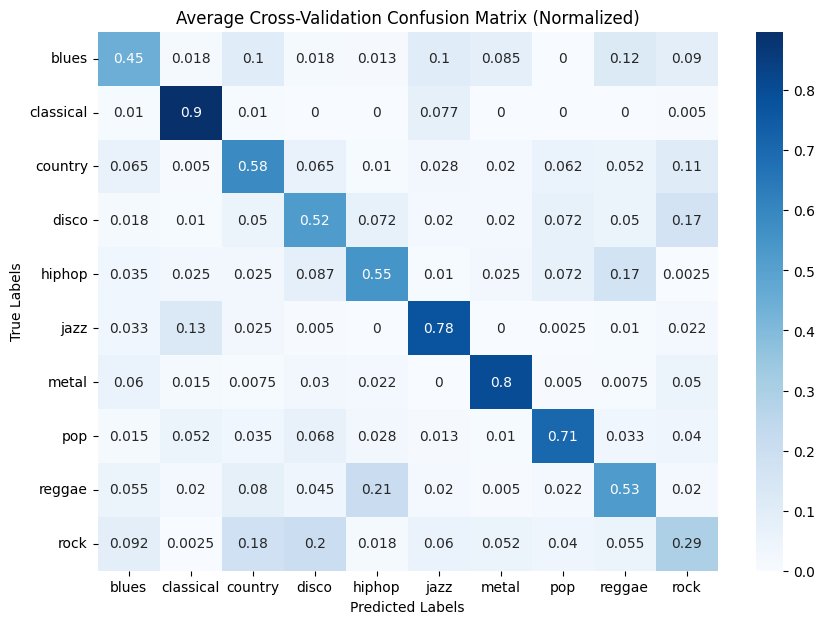

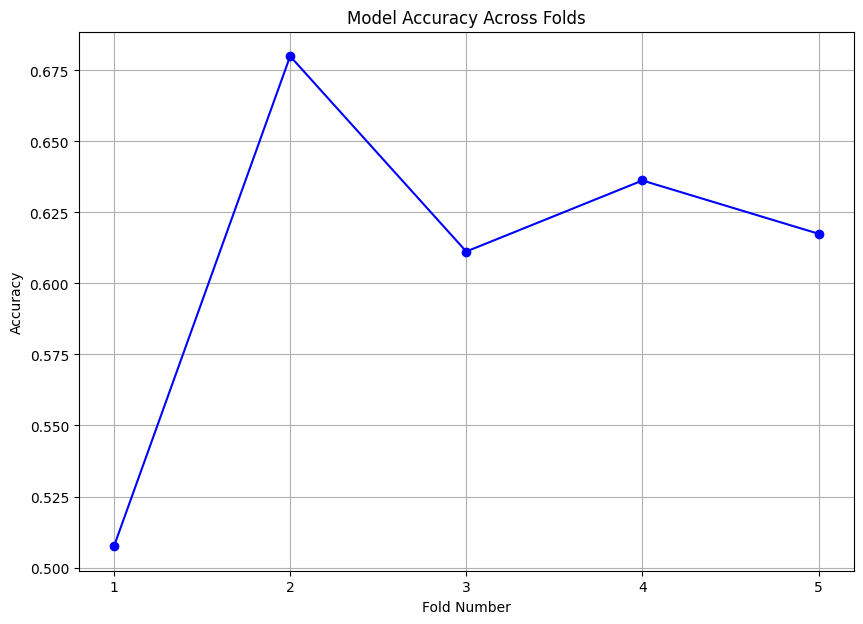

Standard Deviation of Fold Accuracies: 5.684%


In [3]:
# Perform manual 5-fold cross-validation on a SVM model with a Radial Basis Function (RBF) kernel
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics for each fold and initialize the aggregated confusion matrix 
num_folds = 5
fold_size = 99 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a SVM with a RBF kernel and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the SVM model and make a prediction of the genre
    svm_model = SVC(kernel='rbf', gamma='scale')
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Plot the fold accuracies to see variability in performance 
fold_numbers = range(1, len(accuracies) + 1)

plt.figure(figsize=(10, 7))
plt.plot(fold_numbers, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)
plt.grid(True)
plt.show()

# Print standard deviation across fold accuracies 
sd = np.std(accuracies).round(5)
print(f'Standard Deviation of Fold Accuracies: {sd*100}%')


Average classification report:
blues: Precision: 0.5003739609373412, Recall: 0.33, F1-Score: 0.38756054534810186
classical: Precision: 0.840277156650646, Recall: 0.9125, F1-Score: 0.8689675319162073
country: Precision: 0.5420389363930718, Recall: 0.5675000000000001, F1-Score: 0.5479564145240625
disco: Precision: 0.4298328012964793, Recall: 0.47000000000000003, F1-Score: 0.44714611130663506
hiphop: Precision: 0.52492842684069, Recall: 0.505, F1-Score: 0.5025941625941626
jazz: Precision: 0.6923741571306983, Recall: 0.7200000000000001, F1-Score: 0.7002468719660313
metal: Precision: 0.7155627846454131, Recall: 0.8474999999999999, F1-Score: 0.7751469219573617
pop: Precision: 0.6859489984489985, Recall: 0.7299999999999999, F1-Score: 0.700220647963783
reggae: Precision: 0.48513465093832886, Recall: 0.48999999999999994, F1-Score: 0.4847749749703271
rock: Precision: 0.33378057235783076, Recall: 0.25250000000000006, F1-Score: 0.28203234049442416

Average Model Accuracy: 0.5825


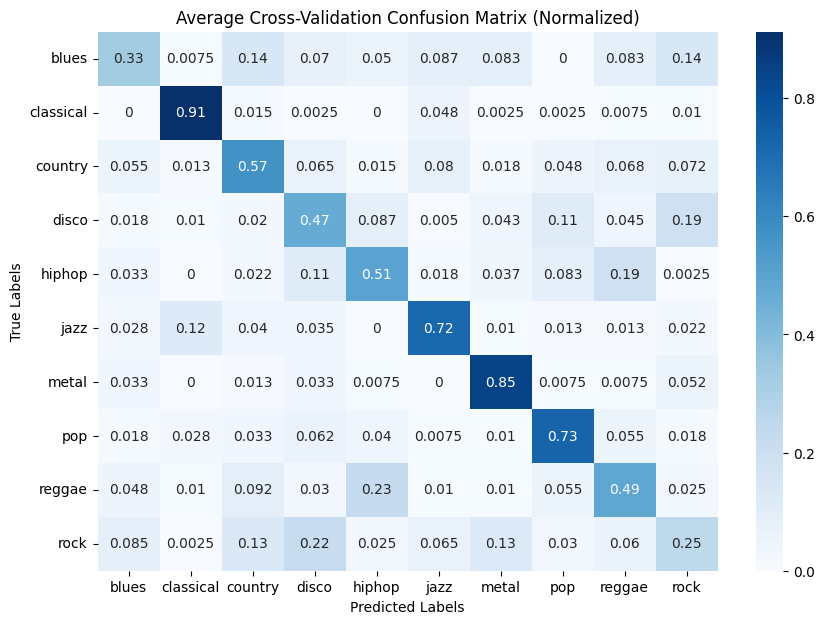

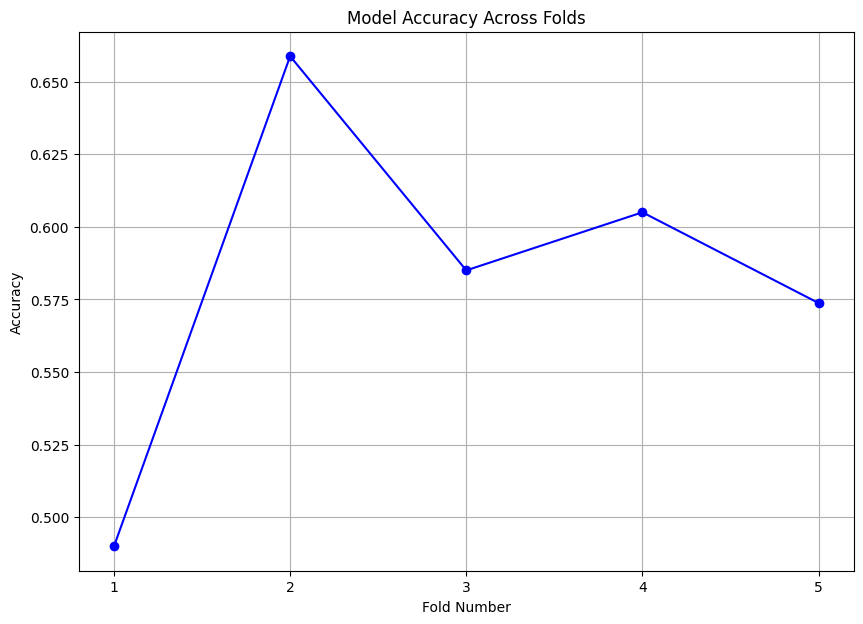

Standard Deviation of Fold Accuracies: 5.47%


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Perform manual 5-fold cross-validation on a RFC model
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics and confusion matrix for each fold
num_folds = 5
fold_size = 99 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a RFC model and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the RFC model and make a prediction of the genre
    rfc_model = RandomForestClassifier(random_state=20)
    rfc_model.fit(X_train_scaled, y_train)
    y_pred = rfc_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Plot the fold accuracies to see variability in performance 
fold_numbers = range(1, len(accuracies) + 1)

plt.figure(figsize=(10, 7))
plt.plot(fold_numbers, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)
plt.grid(True)
plt.show()

# Print standard deviation across fold accuracies 
sd = np.std(accuracies).round(5)
print(f'Standard Deviation of Fold Accuracies: {sd*100}%')


{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
Epoch 1/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1152 - loss: 4.4754 - val_accuracy: 0.1138 - val_loss: 4.3085
Epoch 2/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.1244 - loss: 4.3253 - val_accuracy: 0.1513 - val_loss: 4.1989
Epoch 3/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.1534 - loss: 4.1987 - val_accuracy: 0.1762 - val_loss: 4.0989
Epoch 4/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.1656 - loss: 4.0934 - val_accuracy: 0.2100 - val_loss: 4.0037
Epoch 5/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.1982 - loss: 3.9822 - val_accuracy: 0.2412 - val_loss: 3.9093
Epoch 6/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.1984 - loss: 3.9089 - val_accuracy: 0.2688 - val_loss: 3.8155
Epoch 7/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.2297 - loss: 3.8012 - val_acc

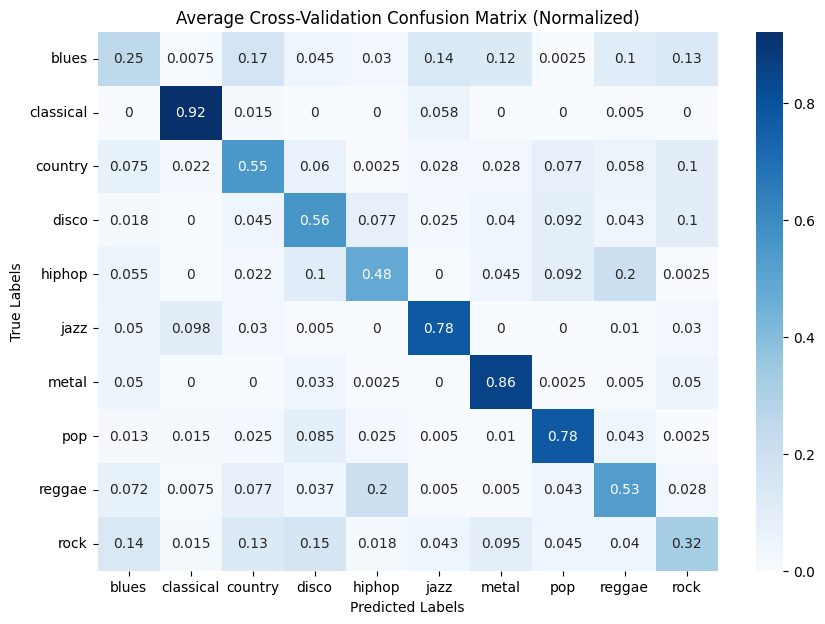

Average accuracy: 0.602999997138977


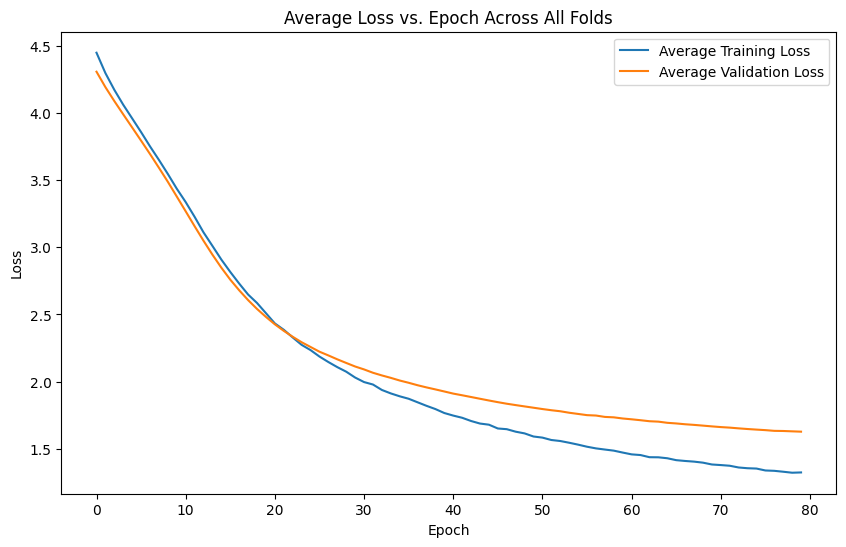

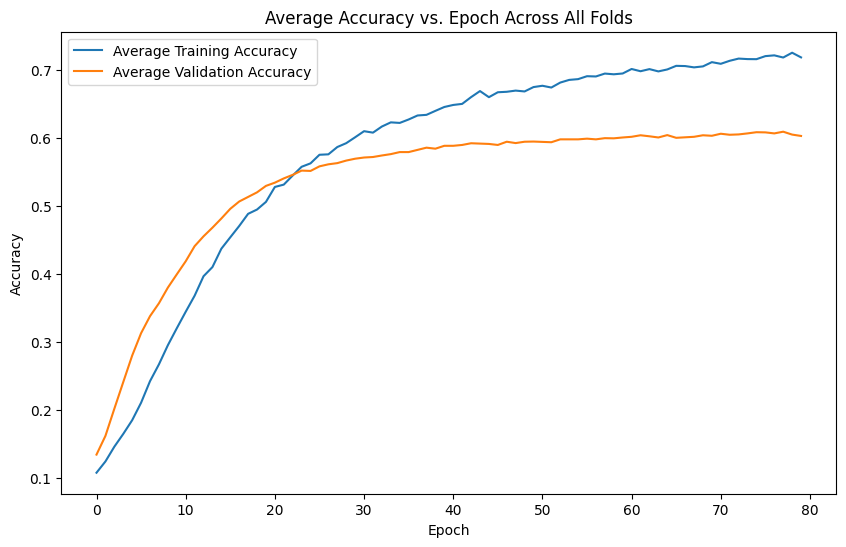

Average classification report:
blues: Precision: 0.5003739609373412, Recall: 0.33, F1-Score: 0.38756054534810186
classical: Precision: 0.840277156650646, Recall: 0.9125, F1-Score: 0.8689675319162073
country: Precision: 0.5420389363930718, Recall: 0.5675000000000001, F1-Score: 0.5479564145240625
disco: Precision: 0.4298328012964793, Recall: 0.47000000000000003, F1-Score: 0.44714611130663506
hiphop: Precision: 0.52492842684069, Recall: 0.505, F1-Score: 0.5025941625941626
jazz: Precision: 0.6923741571306983, Recall: 0.7200000000000001, F1-Score: 0.7002468719660313
metal: Precision: 0.7155627846454131, Recall: 0.8474999999999999, F1-Score: 0.7751469219573617
pop: Precision: 0.6859489984489985, Recall: 0.7299999999999999, F1-Score: 0.700220647963783
reggae: Precision: 0.48513465093832886, Recall: 0.48999999999999994, F1-Score: 0.4847749749703271
rock: Precision: 0.33378057235783076, Recall: 0.25250000000000006, F1-Score: 0.28203234049442416


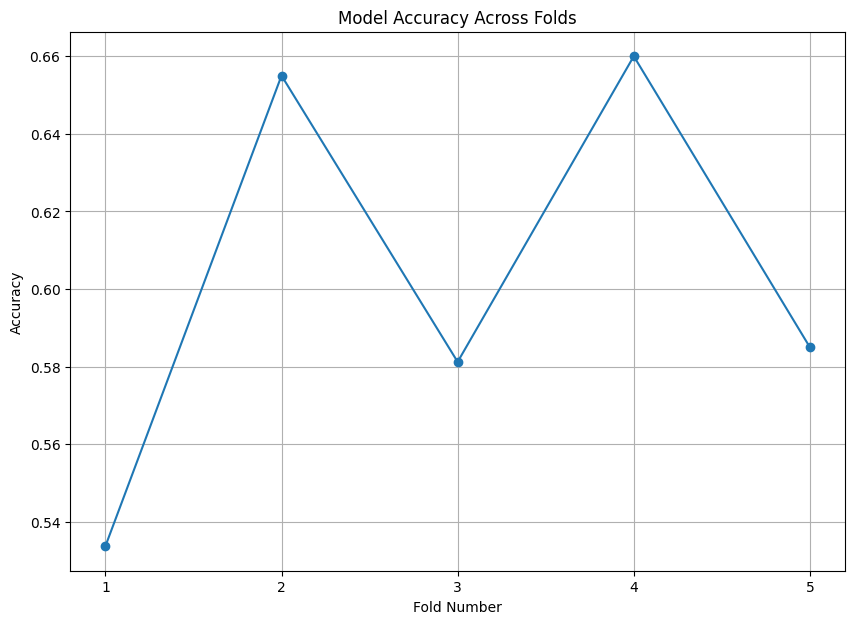

Standard Deviation of Fold Accuracies: 4.805000000000001%


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras as keras

num_folds = 5
fold_size = 99 // num_folds

# Turn genres into numerical encoding for ANN
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])
genre_names = label_encoder.classes_
genre_to_num_mapping = {genre: label_encoder.transform([genre])[0] for genre in genre_names}
print(genre_to_num_mapping) # For reference

# Initialize lists to store metrics
results = [] # tupple of (precision, recall, fscore) for each genre
accuracies = [] # to store accuracy for each fold and later calculate average
folds_histories = [] # to store history of each fold for plotting
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))
for fold in range(num_folds):
    test_start = fold * fold_size
    test_end = test_start + fold_size

    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    X_train = train_df.drop(columns=['filename', 'base_name', 'genre', 'base_num', 'genre_encoded'], axis=1)    
    y_train = train_df['genre_encoded']
    X_test = test_df.drop(columns=['filename', 'base_name', 'genre', 'base_num', 'genre_encoded'], axis=1)    
    y_test = test_df['genre_encoded']
    
    # print(X_train.shape)
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # print(X_train_scaled.shape)
    # print(f"Fold {fold+1}: X_train_scaled: {X_train_scaled.shape}, y_train: {y_train.shape}, X_test_scaled: {X_test_scaled.shape}, y_test: {y_test.shape}")


    # Build and compile the ANN model
    model = Sequential([
        # input layer with 57 features from each song
        Input(shape=(X_train_scaled.shape[1],)), 
        # HIDDEEN LAYERS
        keras.layers.Dense(110, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(74, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model.summary()

    # Train the network
    history = model.fit(X_train_scaled, y_train,
                        validation_data=(X_test_scaled, y_test),
                        epochs=80,
                        batch_size=32)
    # append the last test accuracy value from the last epoch of each fold     
    accuracies.append(history.history['val_accuracy'][-1]) 
    folds_histories.append(history.history)

    # Generate predictions
    y_pred_probabilities = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_probabilities, axis=1)

    # Calculate percision, recall, and fscore for each genre
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre_encoded']))
    results.append((precision, recall, fscore))

    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre_encoded']))
    aggregated_cm += cm
    
    print(accuracies)



# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Average Loss vs. Epoch Plot
average_accuracy = np.mean(accuracies)
print(f'Average accuracy: {average_accuracy}')
avg_train_loss = np.mean([history['loss'] for history in folds_histories], axis=0)
avg_val_loss = np.mean([history['val_loss'] for history in folds_histories], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(avg_train_loss, label='Average Training Loss')
plt.plot(avg_val_loss, label='Average Validation Loss')
plt.title('Average Loss vs. Epoch Across All Folds')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate average accuracy across all folds for each epoch
avg_train_accuracy = np.mean([history['accuracy'] for history in folds_histories], axis=0)
avg_val_accuracy = np.mean([history['val_accuracy'] for history in folds_histories], axis=0)

# Plot the average accuracy
plt.figure(figsize=(10, 6))
plt.plot(avg_train_accuracy, label='Average Training Accuracy')
plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
plt.title('Average Accuracy vs. Epoch Across All Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

# Plot accuracy by fold
plt.figure(figsize=(10, 7))
plt.plot(range(1, num_folds + 1), accuracies, marker='o', linestyle='-')
plt.title('Model Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()

# Print standard deviation across fold accuracies 
sd = np.std(accuracies).round(5)
print(f'Standard Deviation of Fold Accuracies: {sd*100}%')

